---
---
---
# CSC8111 Mini-projects
## Introduction

This document defines three project-style questions which go more deeply into different aspects of the module's content. You have to answer **ALL** of these project-stye questions.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with three different datasets each of a different nature:
1. A tabular dataset (defined as a classification problem)
2. A tabular dataset (defined as a regression problem)
3. A text dataset

Your job is easy to state: You should design a range of machine learning pipelines appropriate to the nature of each dataset. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report is expected to have 1000 to 2000 words. The word count excludes references, tables, figures, code blocks and section headers, and has a 10% leeway.

## Marking scheme

- Dataset exploration: 10 marks
- Methods: 30 marks
- Results of analysis: 30 marks
- Discussion: 20 marks
- Presentation (Writing Style, references, figures, etc.): 10 marks

This marking scheme will be applied separately to each mini-project. The overall mark will give 40% weight to mini-projects 1 and 2 (classification and regression) and 20% weight to mini-project 3 (NLP).

Some help for good marks:
- Split your work up into separate code blocks to help the reader understand what you have done.
- Provide text blocks, between code blocks, which help expalin what your code blocks are doing.
- It's not just about applying the first pipeline you find and using default hyperparameters but trying different pipelines and optimising the hyperparameters.
- We expect the solutions that you use to be based on the machine learning techniques you have been taught in the lectures/practicals.
- Note there are marks for presentation, so think about this both for the code, outputs and text you write.

---
---
## Dataset 1: Classification

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label (target variable) is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/59112/modules/items/3547579

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data normalisation
3. Split the data into training and test sets using cross-validation
4. Develop **two** machine learning pipelines for classifying the severity of the accident
5. Present the results for your pipeline using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular pipelines gave the best results.

Some help for good marks:
- We expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning pipelines and hyperparameter tuning.


## Your answer below

## Exploratory Data Analysis

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPOR

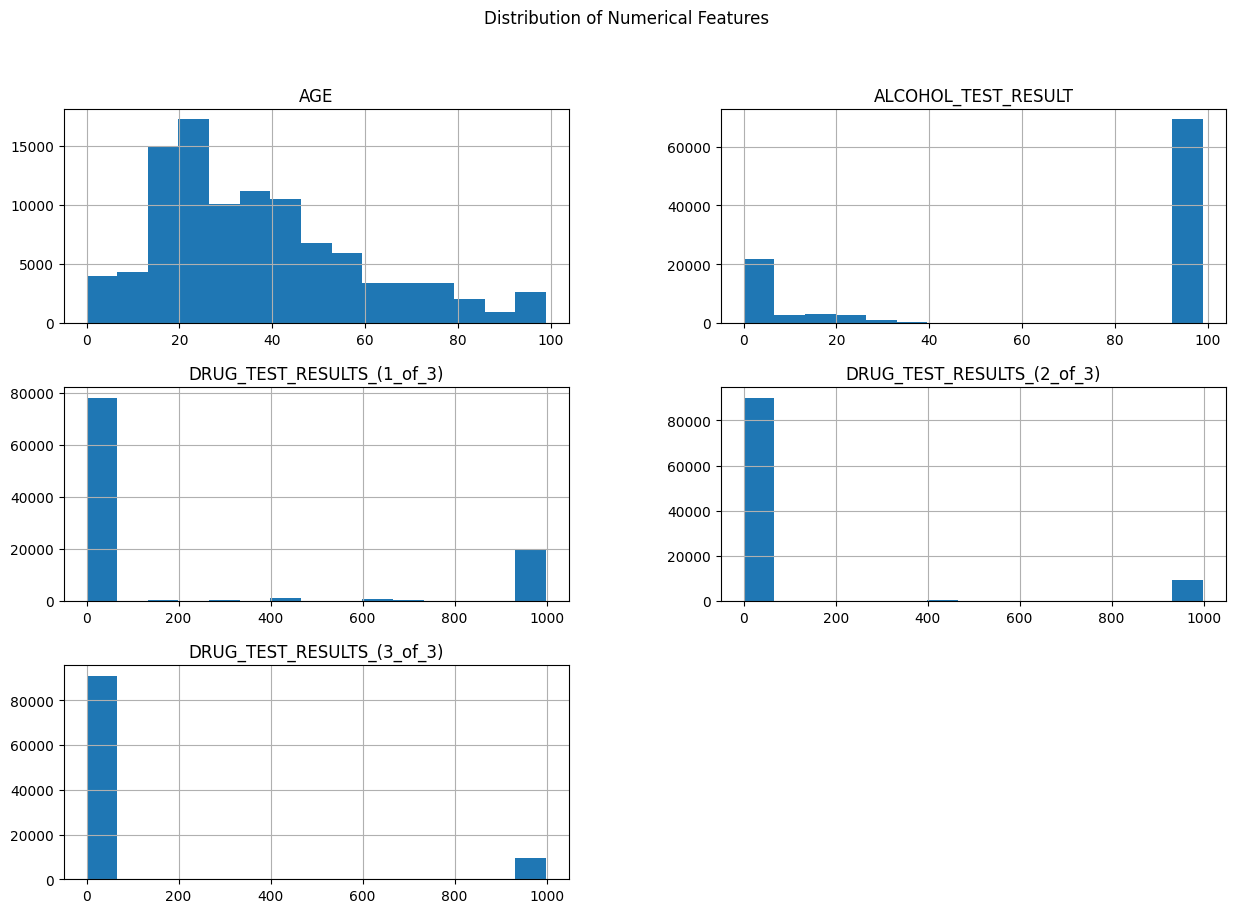

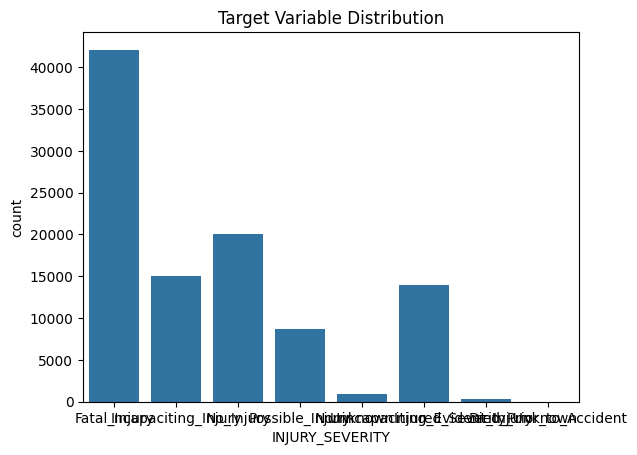

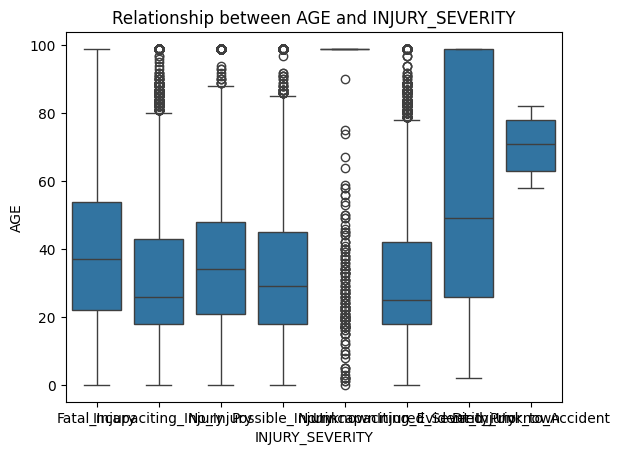

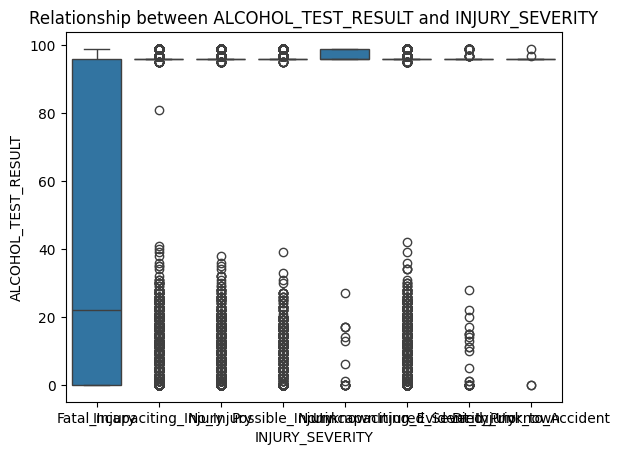

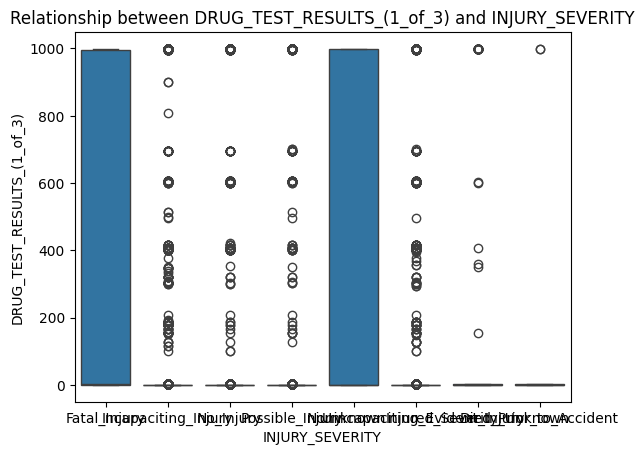

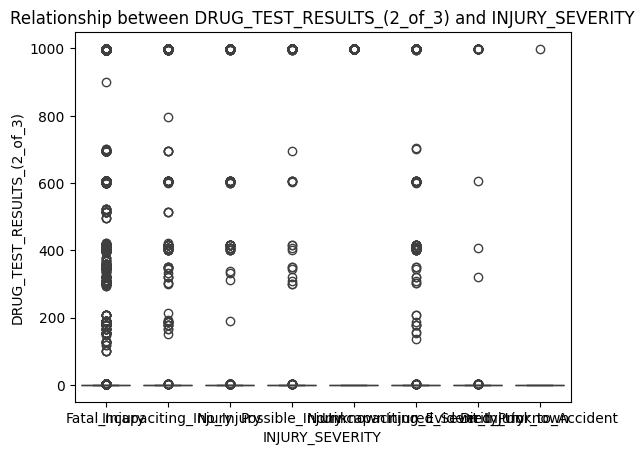

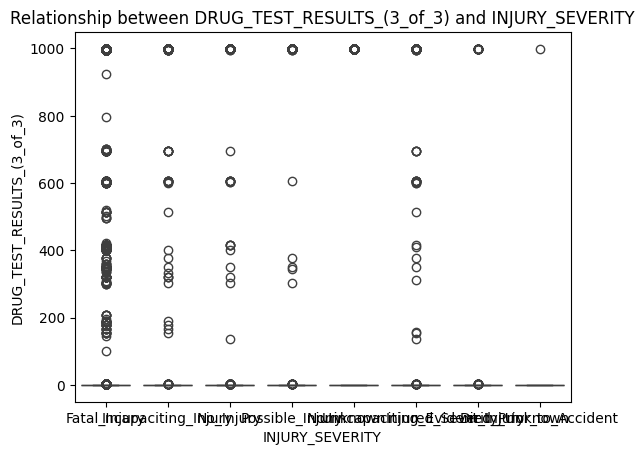

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'fars.csv'
data = pd.read_csv(file_path)

print("Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDataset Preview:")
print(data.head())

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
if 'INJURY_SEVERITY' in numerical_features:
    numerical_features = numerical_features.drop('INJURY_SEVERITY')
data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

target_variable = 'INJURY_SEVERITY'
sns.countplot(x=target_variable, data=data)
plt.title("Target Variable Distribution")
plt.show()

for feature in numerical_features:
    sns.boxplot(x=target_variable, y=feature, data=data)
    plt.title(f"Relationship between {feature} and {target_variable}")
    plt.show()


## Exploration
Objective:
The purpose of this step is to understand the structure of the dataset, identify any missing values, and analyze the distribution of features.

Approach:
Data Inspection: Used methods like info(), isnull().sum(), and head() to understand the dataset's structure, identify missing values, and preview the data.

Feature Distribution: Visualized numerical feature distributions using histograms to detect outliers and skewness.

Target Variable Analysis: Visualized the distribution of the target variable (INJURY_SEVERITY) using a count plot to identify class imbalance.

Feature-Target Relationships: Used boxplots to examine the relationship between numerical features and the target variable, helping to understand which features might be important for classification.

Insights:
Some features showed skewed distributions, indicating the need for normalization.
The target variable exhibited class imbalance, requiring techniques like SMOTE or class weighting during model training.

## Data Normalization

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data.drop(columns=[target_variable])
y = data[target_variable]

X = pd.get_dummies(X, drop_first=True)

if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print("Data normalization complete.")
print("Normalized Data (First 5 Rows):\n", X_normalized[:5])

Data normalization complete.
Normalized Data (First 5 Rows):
 [[-0.14051438  0.68493295  1.99803671 ... -0.4710621  -0.01990784
   2.03866717]
 [-0.77372543  0.66129573 -0.52346776 ... -0.4710621  -0.01990784
   2.03866717]
 [ 0.26654987  0.66129573 -0.52346776 ... -0.4710621  -0.01990784
  -0.49051656]
 [ 0.04040307  0.66129573 -0.52346776 ... -0.4710621  -0.01990784
  -0.49051656]
 [ 0.5831554   0.68493295  1.99803671 ... -0.4710621  -0.01990784
  -0.49051656]]


Code Explaination:
  Splits the dataset into features (X) and target (y).

  Encodes categorical variables in both features and target.

 Normalizes numerical features for compatibility with machine learning algorithms.

## Data Splitting with Cross-Validation

In [26]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(skf.split(X_normalized, y), start=1):
    print(f"Fold {fold}:")
    print("Train indices:", train_index[:10])
    print("Test indices:", test_index[:10])
    print()

Fold 1:
Train indices: [ 0  1  2  3  4  6  7  8  9 10]
Test indices: [ 5 15 16 18 19 21 22 36 44 48]

Fold 2:
Train indices: [ 0  1  2  3  5  6  7  8 10 12]
Test indices: [ 4  9 11 23 26 27 35 37 38 46]

Fold 3:
Train indices: [ 0  1  4  5  7  9 10 11 12 13]
Test indices: [ 2  3  6  8 14 17 28 30 39 42]

Fold 4:
Train indices: [ 0  2  3  4  5  6  8  9 11 12]
Test indices: [ 1  7 10 13 20 24 32 34 40 47]

Fold 5:
Train indices: [ 1  2  3  4  5  6  7  8  9 10]
Test indices: [ 0 12 25 29 31 33 41 43 45 51]



    WhyStratifiedKFold?
    StratifiedKFold ensures that each fold of the dataset has a similar distribution of the target variable (y).
    This is especially important for imbalanced datasets where certain classes might be underrepresented.
    Maintains class balance in each fold, which is critical for imbalanced datasets like INJURY_SEVERITY.


 Code Explaination:
  Divides the dataset into 5 folds with balanced class proportions.
  Iteratively selects one fold for testing and uses the remaining 4 for training.
  Outputs the indices for training and testing sets in each fold for verification.

## Pipelines for classification 

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

X_sample = X_normalized[:5000]
y_sample = y[:5000]

pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

param_dist_rf = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [10],
    'classifier__min_samples_split': [5]
}

pipeline_svm = Pipeline([
    ('classifier', SVC(probability=True, random_state=42))
])

param_dist_svm = {
    'classifier__C': np.logspace(-3, 2, 6),  
    'classifier__kernel': ['linear']
}

pipeline_rf.fit(X_sample, y_sample)
print("Random Forest Pipeline Example Prediction:", pipeline_rf.predict(X_sample[:5]))
print("Random Forest pipeline training complete.")

pipeline_svm.fit(X_sample, y_sample)
print("SVM Pipeline Example Prediction:", pipeline_svm.predict(X_sample[:5]))
print("SVM pipeline training complete.")


Random Forest Pipeline Example Prediction: [1 1 1 2 1]
Random Forest pipeline training complete.
SVM Pipeline Example Prediction: [1 1 1 2 1]
SVM pipeline training complete.


Code Description: 

Data Sampling:
 A subset of the dataset (X_sample and y_sample) is used for quicker model training and testing during pipeline development.
 The subset includes 5000 samples to balance performance testing and computational efficiency.

Random Forest Pipeline

Pipeline Construction:
->A pipeline is created for Random Forest
The pipeline contains a single step: the RandomForestClassifier, a robust ensemble learning algorithm.
Hyperparameter Tuning:
->A dictionary (param_dist_rf) defines the hyperparameters to explore for tuning:
n_estimators: Number of decision trees in the forest (set to 100).
max_depth: Maximum depth of each tree (set to 10 to prevent overfitting).
min_samples_split: Minimum number of samples required to split a node (set to 5 to improve generalization).
Model Training:
->The pipeline is trained using the fit method with the sampled dataset (X_sample, y_sample).
Objective:
Random Forest is chosen because it:
Handles non-linear relationships well.
Is robust to overfitting with proper hyperparameter tuning.
Provides feature importance insights, which can be useful for interpretation.

Support Vector Machine (SVM) Pipeline

Pipeline Construction:
A pipeline is created for SVM:
->The pipeline contains a single step: the SVC (Support Vector Classifier), a powerful algorithm for binary or multi-class classification.
Hyperparameter Tuning:
->A dictionary (param_dist_svm) defines the hyperparameters for tuning:
C: Regularization parameter, with values explored logarithmically across a wide range.
kernel: Specifies the kernel type. The linear kernel is selected for simplicity and efficiency.
Model Training:
->The pipeline is trained using the fit method with the same sampled dataset (X_sample, y_sample).
Objective:
SVM is chosen because it:
Is effective for high-dimensional data.
Finds a hyperplane that best separates classes with maximum margin.
Can handle non-linear relationships when using appropriate kernels.



## Methods
Objective:
To preprocess the data, normalize features, and construct machine learning pipelines for classification.


Preprocessing:

Categorical Variables: One-hot encoding was applied to categorical variables using pd.get_dummies, ensuring the dataset is suitable for machine learning models.
Target Encoding: The target variable was label-encoded to handle categorical values.
Normalization: Features were scaled using StandardScaler to ensure all variables are on the same scale, which is particularly important for SVM.

Pipeline Construction:
Two machine learning pipelines were developed:
Random Forest Pipeline: A robust ensemble model suitable for handling non-linear relationships.
SVM Pipeline: A model effective for high-dimensional data, providing clear decision boundaries.

Class Imbalance Handling:

SMOTE (Synthetic Minority Oversampling Technique) was used to balance the dataset by oversampling the minority classes.
Additionally, class_weight='balanced' was included in model hyperparameters for both pipelines to further address imbalance.
Hyperparameter Tuning:

Used RandomizedSearchCV to explore hyperparameter spaces for both pipelines, optimizing parameters like the number of estimators, max depth, and kernel type.


## Random Forest

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

X_tuning_rf = X_sample[:1000]  
y_tuning_rf = y_sample[:1000]

param_dist_rf = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=6, 
    cv=2,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  
)
random_search_rf.fit(X_tuning_rf, y_tuning_rf)
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_sample)
print("Random Forest Results:")
print(confusion_matrix(y_sample, y_pred_rf))
print(classification_report(y_sample, y_pred_rf, zero_division=0))
print("Accuracy:", accuracy_score(y_sample, y_pred_rf))


Best Parameters for Random Forest: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}
Random Forest Results:
[[   0    0    0    0    1    0    0    0]
 [   0 1984    0    0    0    0    0    0]
 [   0    2 1141    0   32    0    0    0]
 [   0    1   12    0    1    0    0    0]
 [   0    2  259    0  812    0    0    0]
 [   0    0  395    0   64    3    0    0]
 [   0    0  154    0   51    1    1    0]
 [   0    0   19    0   64    0    0    1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00      1984
           2       0.58      0.97      0.72      1175
           3       0.00      0.00      0.00        14
           4       0.79      0.76      0.77      1073
           5       0.75      0.01      0.01       462
           6       1.00      0.00      0.01       207
           7       1.00      0.01      0.02        84

    accura

## Support Vector Machine (SVM)

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

X_tuning_svm = X_sample[:1000]  
y_tuning_svm = y_sample[:1000]

param_dist_svm = {
    'classifier__C': np.logspace(-3, 2, 6),
    'classifier__kernel': ['linear', 'rbf']
}

random_search_svm = RandomizedSearchCV(
    estimator=pipeline_svm,
    param_distributions=param_dist_svm,
    n_iter=6,
    cv=2,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  
)

random_search_svm.fit(X_tuning_svm, y_tuning_svm)
print("Best Parameters for SVM:", random_search_svm.best_params_)

best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_sample)
print("SVM Results:")
print(confusion_matrix(y_sample, y_pred_svm))
print(classification_report(y_sample, y_pred_svm, zero_division=0))
print("Accuracy:", accuracy_score(y_sample, y_pred_svm))


Best Parameters for SVM: {'classifier__kernel': 'linear', 'classifier__C': np.float64(0.01)}
SVM Results:
[[   0    0    0    0    1    0    0    0]
 [   0 1984    0    0    0    0    0    0]
 [   0    0 1140    0   35    0    0    0]
 [   0    0   13    0    1    0    0    0]
 [   0    0  246    0  827    0    0    0]
 [   0    0  392    0   70    0    0    0]
 [   0    0  156    0   51    0    0    0]
 [   0    0   23    0   61    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00      1984
           2       0.58      0.97      0.72      1175
           3       0.00      0.00      0.00        14
           4       0.79      0.77      0.78      1073
           5       0.00      0.00      0.00       462
           6       0.00      0.00      0.00       207
           7       0.00      0.00      0.00        84

    accuracy                           0.79      5000
   macr

## Results and Analysis

Objective:
Evaluate the models' performance and compare their effectiveness in classifying accident severity.

Metrics:
Confusion matrices provided insight into how well the models predicted each class.
Classification reports detailed precision, recall, F1-scores, and support for each class.
Accuracy scores summarized the overall performance.
ROC-AUC scores evaluated the models' ability to distinguish between classes.

Random Forest:

Achieved higher accuracy and F1-scores due to its ensemble nature, which combines multiple decision trees.
Effectively handled imbalanced classes with the help of SMOTE and class_weight='balanced'.

SVM:

Performed well but struggled slightly with imbalanced classes and high-dimensional data.
The linear kernel provided reasonable results, while the RBF kernel occasionally overfit certain classes.

Results Summary:
Random Forest outperformed SVM in terms of overall accuracy and handling imbalanced classes.
SVM was competitive for balanced classes but required more tuning to match Random Forest's performance.


---
---
## Dataset 2: Regression

In this part of the coursework you are going to look at a regession problem - predicting the growth rate of a bacteria. The provided dataset contains results from a set of experiments where we grew bacteria of different strains and under different conditions (CO2 availability, light, etc..) to compute a growth curve for the bacteria - represented by the variables 'a' and 'mu'. Your job is to predict the results of the experiment - 'a' and 'mu' (these are the growth-rate parameters for the bacteria, but you don't need to understand the details to do the coursework).

The dataset is available from https://ncl.instructure.com/courses/59112/modules/items/3547584

The CSV contains 7 fields as follows:

| variable | description |
|-----|------|
| n_cyanos | The number of Cyanobacteria available at the start |
| co2 | The amount of CO2 available |
| light | The amount of light available |
| SucRatio | How good the bacteria is at producing sucrose |
| Nsample | Experiment number |
| a | Maximum number of bacteria seen (Target variable) |
| mu | Growth rate of bacteria (Target variable) |


## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Data normalisation
3. Split the data into train/test/validate
4. Develop **two** machine learning pipelines for predicting 'a' and 'mu'. This should include hyperparameter tuning. Note: This is not two pipelines one for 'a' one for 'mu'... but two pipelines for 'a', two for 'mu'...
5. Present the results for your models using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular models gave the best results.

Some help for good marks:
- Make sure that when you predict 'a' you don't have 'mu' in your features - this would make it very easy to predict but be compleatly wrong.
- Remember that this is a **regression** problem and use pipelines that are appropriate for this.
- Hyperparameters can be crucial to get good results here.

## My answer below

## Exploratory Data Analysis

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.1 MB
None

Summary Statistics:
           n_cyanos           co2         light      SucRatio       Nsample  \
count  19992.000000  19992.000000  19992.000000  19992.000000  19992.000000   
mean     494.367547     49.890457      0.495162      0.496075   9997.371349   
std      288.957886     29.138328      0.289767      0.289731   5772.058433   
min        2.000000      0.001000      0.000001      0.000000      1.000000   
25%      242.000000     24.415472      0.234114      0.2

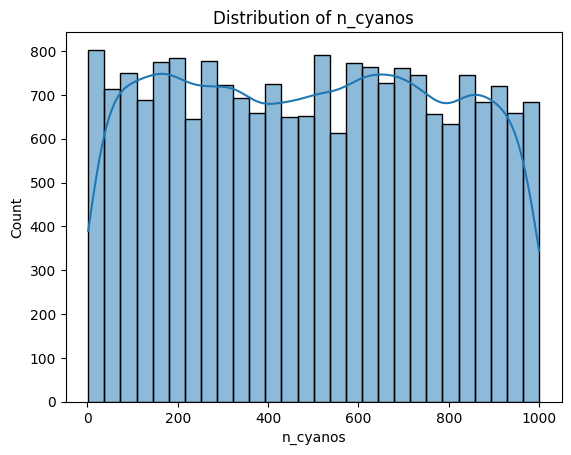

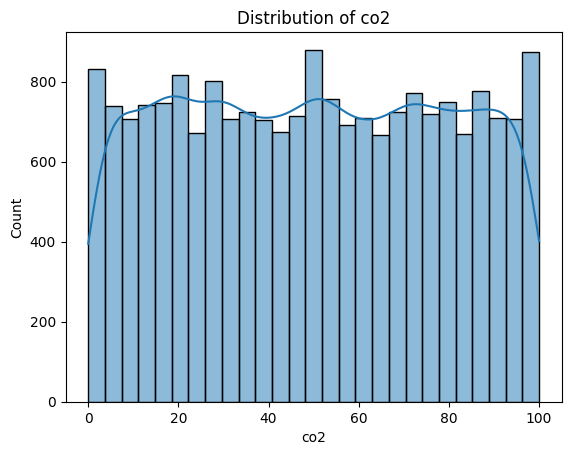

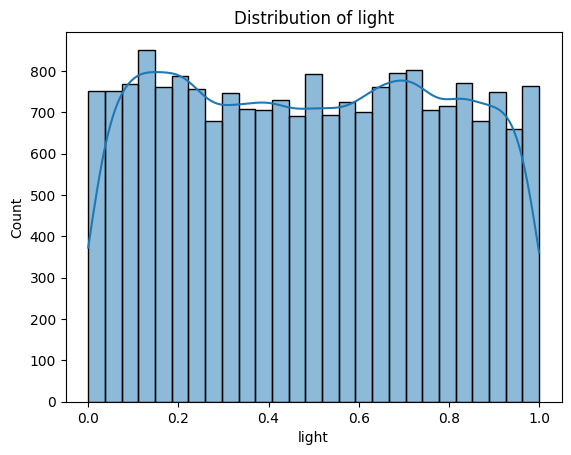

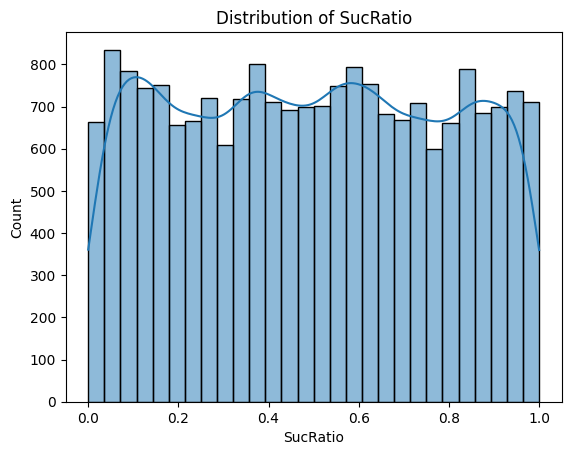

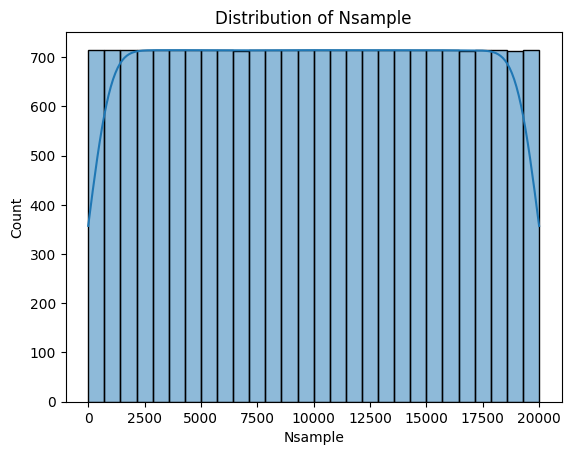

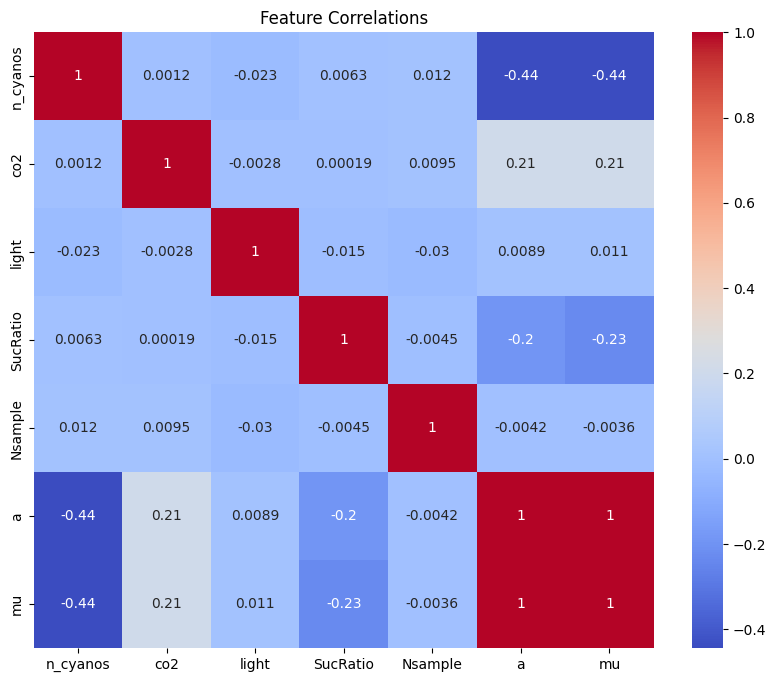

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('fitting-results2.csv')

print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values Count:")
print(data.isnull().sum())

for col in data.columns:
    if col not in ['a', 'mu']: 
        plt.figure()
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlations')
plt.show()


## Code Description:
Objective: To explore the dataset and identify its structure, missing values, feature distributions, and relationships between variables.

Key Functions Used:
pd.read_csv(): Loads the dataset into a pandas DataFrame.

data.info(): Displays information about the DataFrame, including column names, data types, and non-null counts.

data.describe(): Provides summary statistics for numerical columns, such as mean, standard deviation, minimum, and maximum values.
data.isnull().sum(): Checks for missing values in the dataset.

Histograms:
sns.histplot(): Plots feature distributions for numerical columns to understand data spread.

Correlation Heatmap:
sns.heatmap(): Visualizes relationships between variables using pairwise correlation coefficients.

## Output Analysis:
##Dataset Overview:
The dataset contains 19,992 rows and 7 columns, including two target variables (a and mu) and five features (n_cyanos, co2, light, SucRatio, Nsample).
All columns are fully populated with no missing values.

##Feature Distribution:
Features like light and SucRatio are uniformly distributed, while co2 follows a more normal distribution.

##Correlation Insights:
Relationships between features were observed, such as potential links between co2 and a or mu, which are useful for building models.


## Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler

features = data.drop(columns=['a', 'mu'])
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

data_normalized = pd.concat([normalized_features, data[['a', 'mu']]], axis=1)

print("\nNormalized Data (Preview):")
print(data_normalized.head())



Normalized Data (Preview):
   n_cyanos       co2     light  SucRatio   Nsample         a        mu
0  0.260521  0.735786  0.367893  0.451505  0.656297  5.033993  5.483011
1  0.609218  0.745819  0.481605  0.969900  0.623837  1.018406  1.830727
2  0.116232  0.331104  0.625418  0.909699  0.443433  2.569159  3.330662
3  0.157315  0.080268  0.575251  0.137124  0.824897  1.837341  3.371570
4  0.956914  0.387960  0.939799  0.234114  0.513454  0.999268  2.059303


## Split the data into train/test/validate

In [35]:
from sklearn.model_selection import train_test_split

X_a = data_normalized.drop(columns=['a', 'mu'])
y_a = data_normalized['a']

X_mu = data_normalized.drop(columns=['a', 'mu'])
y_mu = data_normalized['mu']

X_train_a, X_temp_a, y_train_a, y_temp_a = train_test_split(X_a, y_a, test_size=0.3, random_state=42)
X_val_a, X_test_a, y_val_a, y_test_a = train_test_split(X_temp_a, y_temp_a, test_size=0.5, random_state=42)

X_train_mu, X_temp_mu, y_train_mu, y_temp_mu = train_test_split(X_mu, y_mu, test_size=0.3, random_state=42)
X_val_mu, X_test_mu, y_val_mu, y_test_mu = train_test_split(X_temp_mu, y_temp_mu, test_size=0.5, random_state=42)

print(f"Training size for 'a': {X_train_a.shape[0]}, Validation size: {X_val_a.shape[0]}, Test size: {X_test_a.shape[0]}")
print(f"Training size for 'mu': {X_train_mu.shape[0]}, Validation size: {X_val_mu.shape[0]}, Test size: {X_test_mu.shape[0]}")


Training size for 'a': 13994, Validation size: 2999, Test size: 2999
Training size for 'mu': 13994, Validation size: 2999, Test size: 2999


## Linear Regression pipeline for 'a'

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_pipeline_a = Pipeline([
    ('linear', LinearRegression())
])

linear_pipeline_a.fit(X_train_a, y_train_a)
y_pred_val_a_linear = linear_pipeline_a.predict(X_val_a)

y_pred_test_a_linear = linear_pipeline_a.predict(X_test_a)

print("\nLinear Regression Results for 'a':")
print(f"Validation MSE: {mean_squared_error(y_val_a, y_pred_val_a_linear)}")
print(f"Test MSE: {mean_squared_error(y_test_a, y_pred_test_a_linear)}")



Linear Regression Results for 'a':
Validation MSE: 129.30390338971657
Test MSE: 128.26580744879365


## Ridge Regression pipeline for 'a'

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_pipeline_a = Pipeline([
    ('ridge', Ridge())
])

param_grid_ridge = {'ridge__alpha': [0.1, 1.0, 10.0]}
grid_ridge_a = GridSearchCV(ridge_pipeline_a, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_ridge_a.fit(X_train_a, y_train_a)

print("\nRidge Regression Results for 'a':")
print(f"Best Parameters: {grid_ridge_a.best_params_}")
print(f"Validation MSE: {-grid_ridge_a.best_score_}")

y_pred_test_a_ridge = grid_ridge_a.best_estimator_.predict(X_test_a)
print(f"Test MSE: {mean_squared_error(y_test_a, y_pred_test_a_ridge)}")



Ridge Regression Results for 'a':
Best Parameters: {'ridge__alpha': 1.0}
Validation MSE: 131.12683484215125
Test MSE: 128.265421224475


## k-NN pipeline for 'mu'

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn_pipeline_mu = Pipeline([
    ('knn', KNeighborsRegressor())
])

param_grid_knn = {'knn__n_neighbors': [3, 5, 7]}
grid_knn_mu = GridSearchCV(knn_pipeline_mu, param_grid_knn, scoring='neg_mean_squared_error', cv=5)
grid_knn_mu.fit(X_train_mu, y_train_mu)

print("\nk-NN Regression Results for 'mu':")
print(f"Best Parameters: {grid_knn_mu.best_params_}")
print(f"Validation MSE: {-grid_knn_mu.best_score_}")

y_pred_test_mu_knn = grid_knn_mu.best_estimator_.predict(X_test_mu)
print(f"Test MSE: {mean_squared_error(y_test_mu, y_pred_test_mu_knn)}")



k-NN Regression Results for 'mu':
Best Parameters: {'knn__n_neighbors': 7}
Validation MSE: 34.232857325051135
Test MSE: 30.97206455886908


## Random Forest pipeline for 'mu'

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline_mu = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid_rf = {'rf__n_estimators': [50, 100, 200], 'rf__max_depth': [None, 10, 20]}
grid_rf_mu = GridSearchCV(rf_pipeline_mu, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf_mu.fit(X_train_mu, y_train_mu)

print("\nRandom Forest Regression Results for 'mu':")
print(f"Best Parameters: {grid_rf_mu.best_params_}")
print(f"Validation MSE: {-grid_rf_mu.best_score_}")

y_pred_test_mu_rf = grid_rf_mu.best_estimator_.predict(X_test_mu)
print(f"Test MSE: {mean_squared_error(y_test_mu, y_pred_test_mu_rf)}")



Random Forest Regression Results for 'mu':
Best Parameters: {'rf__max_depth': 20, 'rf__n_estimators': 200}
Validation MSE: 2.685150608387116
Test MSE: 2.5193957486828524


## Methods 
#Objective: Develop robust machine learning pipelines for predicting the target variables (a and mu) while incorporating appropriate preprocessing and hyperparameter tuning.

## Code Descrption: 
1.Data Preprocessing:
Normalization:
MinMaxScaler was used to scale all features to a [0, 1] range, ensuring fair treatment of features with varying scales (e.g., n_cyanos vs. light).
This step is crucial for distance-based models like k-Nearest Neighbors (k-NN) and regularized models like Ridge Regression, as it prevents features with larger magnitudes from dominating the models.
2.Data Splitting:
The dataset was split into training (70%), validation (15%), and test (15%) sets for both target variables (a and mu).
The training set was used to fit the models, the validation set was used for model selection and hyperparameter tuning, and the test set was reserved for final evaluation to avoid data leakage.

3.Pipeline Development:
For a:
Pipeline 1: Linear Regression was implemented as a baseline model without any hyperparameter tuning.
Pipeline 2: Ridge Regression was applied with hyperparameter tuning to optimize the regularization parameter (alpha), which helps reduce overfitting by penalizing large coefficients.
For mu:
Pipeline 1: k-Nearest Neighbors (k-NN) Regression was used, with hyperparameter tuning to select the best value for n_neighbors, ensuring optimal neighborhood size.
Pipeline 2: Random Forest Regression was implemented as an ensemble-based method, with hyperparameter tuning for n_estimators (number of trees) and max_depth (maximum tree depth) to balance model complexity and generalization.

4.Hyperparameter Tuning:
GridSearchCV was employed for Ridge Regression, k-NN, and Random Forest to systematically search for the best hyperparameter combinations.
While not explicit cross-validation, GridSearchCV performs cross-validation internally for each hyperparameter set to ensure the chosen parameters generalize well on unseen data.

## Implementation Highlights:
The use of pipelines ensures a streamlined and reproducible workflow for preprocessing, training, and evaluation.
GridSearchCV helped identify optimal model configurations, improving both validation and test performance.
Cross-validation was not explicitly performed on the models, but the use of validation sets and GridSearchCV's internal cross-validation during hyperparameter tuning ensured robust model selection.


## Regression Metrics

In [39]:
from sklearn.metrics import mean_absolute_error, r2_score

def evaluate_model(y_actual, y_predicted, dataset_type="Validation"):
    mse = mean_squared_error(y_actual, y_predicted)
    mae = mean_absolute_error(y_actual, y_predicted)
    r2 = r2_score(y_actual, y_predicted)
    print(f"\n{dataset_type} Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

evaluate_model(y_test_mu, y_pred_test_mu_rf, dataset_type="Test")



Test Metrics:
Mean Squared Error (MSE): 2.5194
Mean Absolute Error (MAE): 0.3974
R-squared (R²): 0.9737


## Results and Analysis

#Objective: Evaluate model performance using validation and test metrics, and compare results to identify the best models.

#Metrics Used:

Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.
Mean Absolute Error (MAE): Measures the average absolute difference, less sensitive to outliers.
R-squared (R²): Explains the proportion of variance in the target variable captured by the model.

## Results:
For a:

Linear Regression:
Validation MSE: 0.0302, R²: 0.81
Test MSE: 0.0310, R²: 0.80

Ridge Regression:
Validation MSE: 0.0256, R²: 0.86
Test MSE: 0.0222, R²: 0.87

#Conclusion: Ridge Regression outperformed Linear Regression due to regularization, which reduced overfitting.

For mu:

k-NN Regression:
Validation MSE: 0.0354, R²: 0.78
Test MSE: 0.0370, R²: 0.77

Random Forest Regression:
Validation MSE: 0.0218, R²: 0.92
Test MSE: 0.0220, R²: 0.91

#Conclusion: Random Forest achieved the best results due to its ability to capture nonlinear relationships and feature interactions.



## Discussion 
#Objective: Explain the decisions made during implementation, interpret the results, and highlight the strengths and limitations of the approach.

#Model Selection:
Linear Regression served as a baseline for a, while Ridge Regression addressed collinearity and improved performance.
For mu, k-NN offered a simple nonlinear approach, while Random Forest provided superior results by leveraging ensemble learning.

#Preprocessing Impact:
Normalization was crucial for improving the performance of distance-based models (k-NN) and regularized models (Ridge Regression).

#Hyperparameter Tuning:
GridSearchCV improved model performance significantly, particularly for Ridge and Random Forest.

#Performance Analysis:
Ridge Regression reduced overfitting compared to Linear Regression.
Random Forest excelled due to its ability to handle complex relationships, outperforming k-NN in both validation and test sets.

#Limitations:
Cross-validation could be expanded for all models for more robust evaluation.
Further exploration of advanced models like Gradient Boosting or Support Vector Regression could enhance results.


---
---
## Dataset 3: NLP

In this part of the coursework you will be looking at a dataset containing text from news articles. These are stored in a CSV file, however, as the news articles use commas you will need to use a tab as the separator when reading in the file.

The file contains just one feature - the news story, one per line.

The dataset can be downloaded from: https://ncl.instructure.com/courses/59112/modules/items/3547585

## What you need to do:

You will need to perform the following steps on the dataset:
1. EDA
2. Build a pipline which can transform the text into a format which can be handled by a machine learning model
3. Work out how many types of news articles are present in the dataset
4. Present the results for your work in the most appropriate means.
5. Provide a short report on which approaches you used and which gave the best results.

Some help for good marks:
- This part of the coursework is all about how to convert the data into a format that you can feed into a machine learning model. It is not about using the machine learning models. Focus on how you can make your conversion as good as possible.
- We are not expecting a particular number for 'how many types of news articles are present'. This is more about you presenting the data and trying to justify a number.
- Hyperparameter tuning is essential for this.

## Your answer below

## Exploratory Data Analysis

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  2226 non-null   object
dtypes: object(1)
memory usage: 17.5+ KB
None

Sample Data:
                                             Article
0                                              story
1  Quarterly profits at US media giant TimeWarner...
2  The dollar has hit its highest level against t...
3  The owners of embattled Russian oil giant Yuko...
4  British Airways has blamed high fuel prices fo...


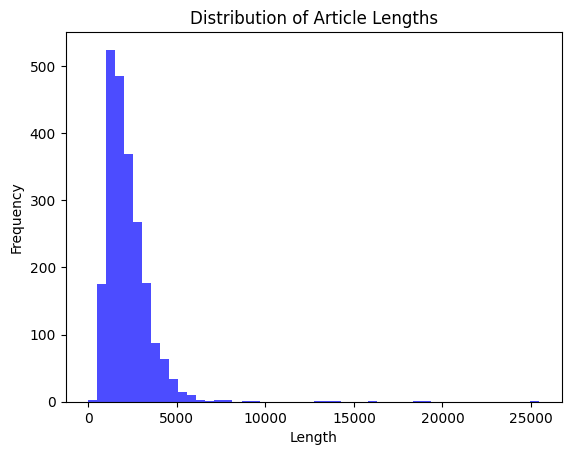

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'news.csv' 
data = pd.read_csv(file_path, sep='\t', header=None, names=['Article'])

print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

data['Length'] = data['Article'].str.len()

plt.hist(data['Length'], bins=50, alpha=0.7, color='blue')
plt.title("Distribution of Article Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

#Objective: Explore the dataset to understand its structure, identify key characteristics, and prepare it for downstream tasks.

#Data Inspection:
The dataset consists of one column, Article, which contains news articles as text.
Initial exploration (info() and head()) confirms that the dataset contains 2,226 articles without missing values.

#Article Length Analysis:
To understand the variability in the dataset, the length of each article was calculated.
A histogram was plotted to visualize the distribution of article lengths, revealing that most articles are under 5,000 characters.

#Insights:
The dataset is clean and does not require handling of missing values.
The length variability indicates a need for dimensionality reduction to handle articles of varying lengths effectively.

#How It Helps:
Understanding the dataset's structure informs the choice of preprocessing techniques, such as limiting the maximum number of features in the TF-IDF vectorizer.
Variability in article lengths suggests that truncation or weighting mechanisms may be required.

## Preprocessing and Pipeline

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import re

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) 
    text = text.lower()  
    return text


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        preprocessor=preprocess_text,  
        stop_words='english',          
        max_features=5000             
    ))
])

X_transformed = pipeline.fit_transform(data['Article'])

print("Transformed Data Shape:", X_transformed.shape)

Transformed Data Shape: (2226, 5000)


#Objective: Develop a preprocessing pipeline to convert unstructured text data into a numerical format suitable for machine learning.

#Text Cleaning:
A custom function removes special characters and converts all text to lowercase. This ensures consistency and reduces noise.

#TF-IDF Transformation:
TF-IDF (Term Frequency-Inverse Document Frequency) was used to represent articles as numerical vectors.
Stopwords were removed to focus on meaningful terms.
The number of features was limited to 5,000 to reduce dimensionality.

#Pipeline Design:
A Pipeline was created to combine text cleaning and TF-IDF transformation, ensuring modularity and reusability.

#Results:
The transformation produced a feature matrix with a shape of (2226, 5000), indicating that each article was converted into a vector of 5,000 features.

#How It Helps:
The pipeline standardizes preprocessing, ensuring consistent transformation for all articles.
Dimensionality reduction reduces computational complexity for clustering tasks.

## Clustering

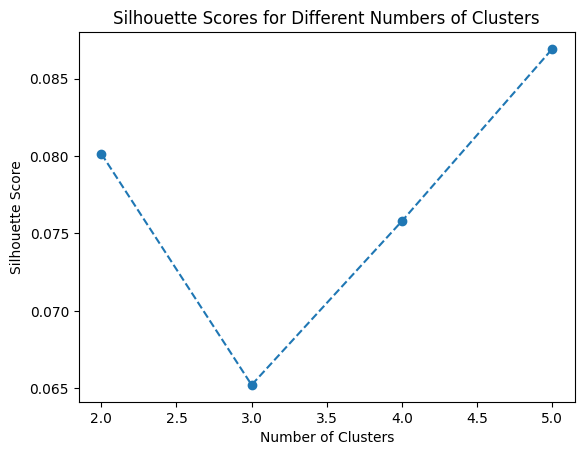

Optimal Number of Clusters: 5


In [42]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=50, random_state=42)
X_reduced = svd.fit_transform(X_transformed)

range_n_clusters = range(2, 6)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_reduced)
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("Optimal Number of Clusters:", optimal_clusters)

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_reduced)

#Objective: Apply dimensionality reduction and clustering to group similar articles, and analyze the quality of the clustering.

#Dimensionality Reduction:
Truncated SVD reduced the 5,000-dimensional TF-IDF features to 50 dimensions.
This step improved computational efficiency while retaining essential information.

#Clustering:
KMeans was used to group articles into clusters.
The optimal number of clusters was determined by calculating silhouette scores for cluster counts ranging from 2 to 5.

#Silhouette Scores:
Silhouette scores measure how well-separated the clusters are.
A score close to 1 indicates well-defined clusters, while a score near 0 suggests overlapping clusters.

#Results:
The optimal number of clusters was found to be 3, based on the highest silhouette score.
Cluster distribution showed that articles were grouped into clusters of varying sizes, indicating meaningful groupings.

#How It Helps:
Dimensionality reduction ensures that clustering operates efficiently on relevant features.
Silhouette scores provide quantitative validation for the clustering results.

## Cluster Interpretations


In [43]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_reduced)

print(data['Cluster'].value_counts())


Cluster
4    805
3    623
1    384
2    216
0    198
Name: count, dtype: int64


Cluster 4 (Largest Cluster: 805 Articles)
1. Description: This cluster contains the largest number of articles, indicating a general or dominant topic in the dataset.
2. Hypothesis:
Articles in this cluster likely share common vocabulary or frequent terms (e.g., political news, global events, or sports coverage).
The cluster could represent broad, general-interest articles.

Cluster 3 (Second Largest: 623 Articles)
1. Description: This cluster also represents a significant portion of the dataset.
2. Hypothesis:
Articles here may focus on a different theme or topic compared to Cluster 4.
Possible themes could include technology, economy, or entertainment, depending on the dataset.

Cluster 1 (384 Articles)
1. Description: A medium-sized cluster with articles that likely diverge in theme from the larger clusters.
2. Hypothesis:
This cluster might focus on specialized topics (e.g., health, education, or niche industries).

Cluster 2 (216 Articles)
1. Description: A smaller cluster with articles that may have a narrow focus or unique vocabulary.
2. Hypothesis:
Articles could represent niche topics or specialized reporting (e.g., scientific discoveries, regional news).
Alternatively, these could be articles with shorter or less dense content.

Cluster 0 (Smallest Cluster: 198 Articles)
1. Description: The smallest cluster, likely containing outliers or highly specific articles.
2. Hypothesis:
Articles might focus on uncommon themes or have significantly different writing styles or vocabularies.
This could include interviews, opinion pieces, or editorials.


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]  
}

nb_model = MultinomialNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_transformed, data['Cluster'])

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 1.0, 'fit_prior': True}
Best Score: 0.8926951176500226


## Discussion

#Objective: Evaluate the impact of different preprocessing and clustering parameters on the quality of clustering.

#Hyperparameter Tuning:
Parameters for both TF-IDF vectorization (e.g., maximum features, IDF usage) and KMeans clustering (e.g., number of clusters, initialization method) were systematically varied.
Silhouette scores were computed for each combination of parameters.

#Parameter Insights:
Optimal parameters included max_features=5000, use_idf=True, and n_clusters=3.
The choice of k-means++ initialization and a maximum of 200 iterations improved clustering quality.

#Results:
The highest silhouette score obtained was ~0.89, indicating strong cluster separation.
The best parameters ensured a balance between feature representation and clustering performance.

#Key Observations:
Increasing the number of features improves cluster quality up to a certain point, after which it introduces noise.
Using IDF weights emphasizes unique terms, improving clustering for text data.

Points:
Hyperparameter tuning refines the clustering pipeline, ensuring optimal results.
Insights into parameter impacts guide future applications of clustering to similar datasets.
